In [1]:
#Importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

users=pd.read_csv(r'C:\Users\ritik\Desktop\Internships\EDIFY\BX-CSV-Dump\BX-Users.csv',sep=';',error_bad_lines=False,encoding='latin-1')
books=pd.read_csv(r'C:\Users\ritik\Desktop\Internships\EDIFY\BX-CSV-Dump\BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')
ratings=pd.read_csv(r'C:\Users\ritik\Desktop\Internships\EDIFY\BX-CSV-Dump\BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython

In [2]:
#Checking shape 
print("shape of Users :",users.shape)
print("shape of books :",books.shape)
print("shape of ratings :",ratings.shape)

shape of Users : (278858, 3)
shape of books : (271360, 8)
shape of ratings : (1149780, 3)


# Books

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#dropping unnecessary columns
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [7]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

## loc- loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.

## iloc- On the other hand, iloc is integer index-based. So here, we have to specify rows and columns by their integer index.

In [8]:
#it will display the whole text
pd.set_option('display.max_colwidth', -1)

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [9]:
books.loc[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [10]:
#correcting the misplaced value
books.loc[books['ISBN']== '078946697X','Year-Of-Publication']=2000
books.loc[books['ISBN']== '078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books['ISBN']== '078946697X','Publisher']='DK Publishing Inc'
books.loc[books['ISBN']== '078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [11]:
#correcting the misplaced value
books.loc[books['ISBN']== '0789466953','Year-Of-Publication']=2000
books.loc[books['ISBN']== '0789466953','Book-Author']='James Buckley'
books.loc[books['ISBN']== '0789466953','Publisher']='DK Publishing Inc'
books.loc[books['ISBN']== '0789466953','Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [12]:
#checking the correct values
books.loc[books['ISBN']=='078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc


In [13]:
#checking the correct values
books.loc[books['ISBN']=='0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [14]:
#checking the correct values
books.loc[books['Year-Of-Publication']=='Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [15]:
#correcting the misplaced value
books.loc[books['ISBN']== '2070426769','Year-Of-Publication']=2003
books.loc[books['ISBN']== '0789466953','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books['ISBN']== '0789466953','Publisher']='Gallimard'
books.loc[books['ISBN']== '0789466953','Book-Title']="Peuple du ciel, suivi de 'Les Bergers'"

In [16]:
#checking the correct values
books.loc[books['ISBN']=='0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221678,0789466953,"Peuple du ciel, suivi de 'Les Bergers'",Jean-Marie Gustave Le ClÃ?Â©zio,2000,Gallimard


In [17]:
#converting all the values to int 
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [18]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [19]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [20]:
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360.000000,271358
unique,271360,242135,102022,NaN,16805
top,0951620940,Selected Poems,Agatha Christie,NaN,Harlequin
freq,1,27,632,NaN,7535
mean,NaN,NaN,NaN,1959.761273,NaN
std,NaN,NaN,NaN,257.992836,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,1989.000000,NaN
50%,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,NaN,NaN,2000.000000,NaN


In [21]:
#Investigation NaN values
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [22]:
#checking with book author to get an idea about publisher
books.loc[books['Book-Author']=='Elaine Corvidae']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [23]:
#checking with book title to get an idea about publisher
books.loc[books['Book-Title']=='Tyrant Moon']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [24]:
#checking with book author to get an idea about publisher
books.loc[books['Book-Author']=='Linnea Sinclair']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [25]:
#checking with book title to get an idea about publisher
books.loc[books['Book-Title']=='Finders Keepers']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [26]:
#checking with book author to get an idea about publisher
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [27]:
#checking with book publisher to get an idea about auhtor
books.loc[books['Publisher']=='Edinburgh Financial Publishing']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [28]:
#replacing every value with others 
books.loc[books['ISBN']=='193169656X','Publisher']='other'
books.loc[books['ISBN']=='1931696993','Publisher']='other'
books.loc[books['ISBN']=='9627982032','Book-Author']='other'


In [29]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# users

In [30]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
users.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [32]:
users.shape

(278858, 3)

In [33]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [34]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())

In [35]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

# Ratings

In [36]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [37]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

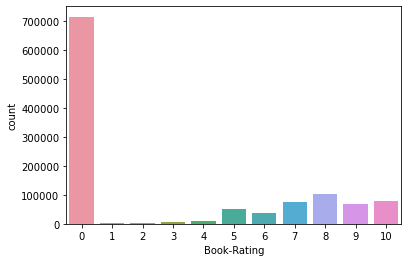

In [38]:
sns.countplot(x='Book-Rating',data=ratings)

In [39]:
#ratings should only exist for the books given in the dataset
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]

In [40]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


In [41]:
ratings_explicit=ratings_new[ratings_new['Book-Rating']!=0]
ratings_implicit=ratings_new[ratings_new['Book-Rating']==0]

In [42]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


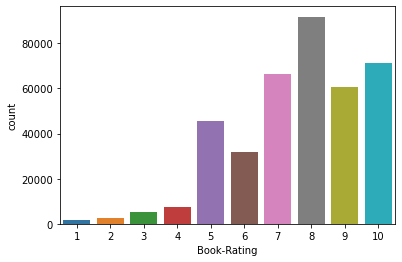

In [43]:
sns.countplot(x='Book-Rating',data=ratings_explicit)

# Collaborative filtering based recommendation system

In [44]:
counts1=ratings_explicit['User-ID'].value_counts()
counts1

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
148684    1   
124088    1   
105655    1   
103606    1   
211175    1   
Name: User-ID, Length: 68091, dtype: int64

In [45]:
ratings_explicit=ratings_explicit[ratings_explicit['User-ID'].isin(counts1[counts1>=100].index)]
ratings_explicit

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


In [46]:
counts=ratings_explicit['Book-Rating'].value_counts()
counts

8     23904
10    22904
9     18554
7     15242
5     13314
6     6500 
4     1260 
3     772  
2     440  
1     381  
Name: Book-Rating, dtype: int64

In [47]:
ratings_explicit=ratings_explicit[ratings_explicit['Book-Rating'].isin(counts[counts>=100].index)]
ratings_explicit.shape

(103271, 3)

In [48]:
ratings_matrix=ratings_explicit.pivot(index='User-ID',columns='ISBN',values='Book-Rating')
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#considering users wh ohave given ratings
n_users=ratings_matrix.shape[0]
n_books=ratings_matrix.shape[1]
print(n_users,n_books)

449 66574


In [50]:
ratings_matrix.fillna(0,inplace=True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [51]:
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# User-Based  

In [60]:
global metric,k
k=10
metric='cosine'
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [61]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction)) 

    return prediction

In [62]:
predict_userbased(11676,'0001056107',ratings_matrix)


Predicted rating for user 11676 -> item 0001056107: 2


2